In [1]:
## Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split,GridSearchCV

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
## Reading the csv file names Zoo.
zoo=pd.read_csv("Zoo.csv")

In [4]:
zoo.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [5]:
zoo.shape

(101, 18)

In [6]:
## Checking for null values
zoo.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [7]:
## There is no null values in the dataset.

In [8]:
## No duplicate columns in the dataset.
zoo.duplicated().sum()

0

In [9]:
len(zoo['animal name'].unique())
## Here we can analyze that each animal having different name.so the name is not contributing anything to predict the type 
## and correlation with target is very very less..so Iam dropping the ' animal name' column

100

In [10]:
zoo.drop('animal name',axis=1,inplace=True)

In [11]:
zoo.columns

Index(['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator',
       'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail',
       'domestic', 'catsize', 'type'],
      dtype='object')

In [12]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   hair      101 non-null    int64
 1   feathers  101 non-null    int64
 2   eggs      101 non-null    int64
 3   milk      101 non-null    int64
 4   airborne  101 non-null    int64
 5   aquatic   101 non-null    int64
 6   predator  101 non-null    int64
 7   toothed   101 non-null    int64
 8   backbone  101 non-null    int64
 9   breathes  101 non-null    int64
 10  venomous  101 non-null    int64
 11  fins      101 non-null    int64
 12  legs      101 non-null    int64
 13  tail      101 non-null    int64
 14  domestic  101 non-null    int64
 15  catsize   101 non-null    int64
 16  type      101 non-null    int64
dtypes: int64(17)
memory usage: 13.5 KB


#### all the columns are type int..so no need to labelling the categorical columns(already converted)

#### majority of the columns are converted categorical columns with 0s and 1s.therefore outlier detection is not required.

In [15]:
## and also scalling is not required.

<Axes: xlabel='legs', ylabel='count'>

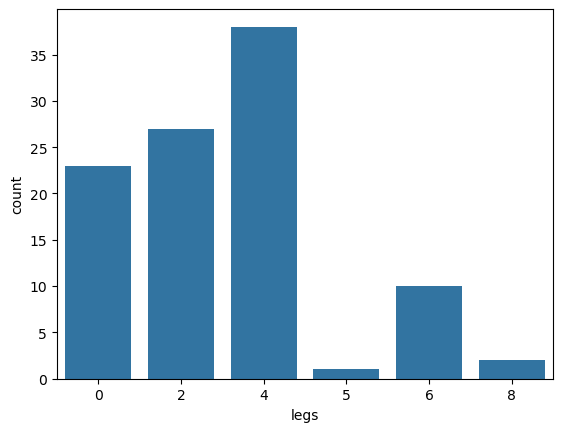

In [16]:
sns.countplot(data=zoo,x='legs')

In [17]:
## most of the animals having 4 legs.

<Axes: xlabel='tail', ylabel='count'>

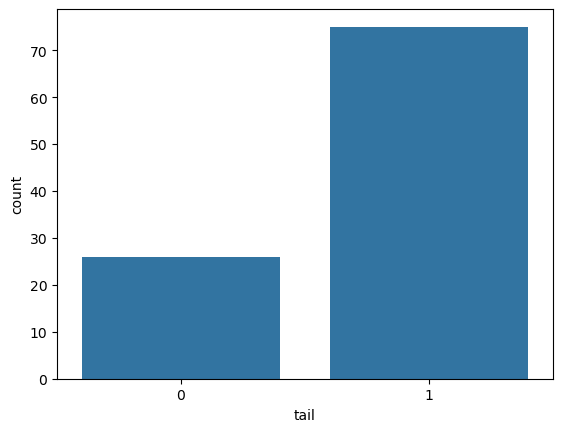

In [18]:
sns.countplot(data=zoo,x='tail')

In [28]:
## most of the animals having tail

<Axes: xlabel='domestic', ylabel='count'>

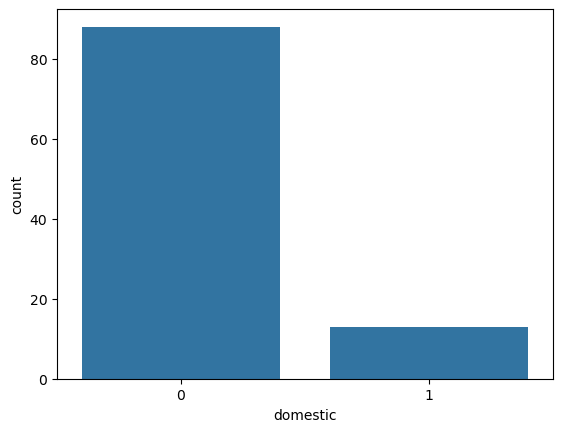

In [33]:
sns.countplot(data=zoo,x='domestic')

In [37]:
## Only few animals are domestic.

### Deviding the dataset into Features and Target column.

In [41]:
features=zoo.drop('type',axis=1)

In [44]:
target=zoo['type']

In [46]:
#### Deviding the features and target into training and testing in 8:2 proportion.

In [48]:
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.8,random_state=30)

In [50]:
x_train.shape

(80, 16)

In [52]:
x_test.shape

(21, 16)

#### From GridSearch we got 5 as a value for the n_neighbors parameter.

In [55]:
## Defining knn
knn=KNeighborsClassifier(n_neighbors=5)

In [57]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [59]:
y_pred=knn.predict(x_train)

In [61]:
y_pred1=knn.predict(x_test)

In [63]:
## Accuracy score of training validation
accuracy_score(y_train,y_pred)

0.9625

In [65]:
## Accuracy score of testing validation
accuracy_score(y_test,y_pred1)

0.9523809523809523

#### Using GridSearch to get a value for n_neighbors(hyper parameter)

In [131]:
param=dict(n_neighbors=range(5,15))
grid_search=GridSearchCV(knn,param)

In [69]:
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(5, 15)})

In [70]:
grid_search.best_params_

{'n_neighbors': 5}

In [73]:
from sklearn.metrics import confusion_matrix,classification_report

In [86]:
## Getting confusion matrix for testing data(testing validation)
conf=confusion_matrix(y_test,y_pred1)

In [88]:
conf

array([[8, 0, 0, 0, 0, 0],
       [0, 6, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 4, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1]], dtype=int64)

In [80]:
## confusion matrix for testing data
conf1=confusion_matrix(y_train,y_pred)

Text(0.5, 1.0, 'Confusion Matrix')

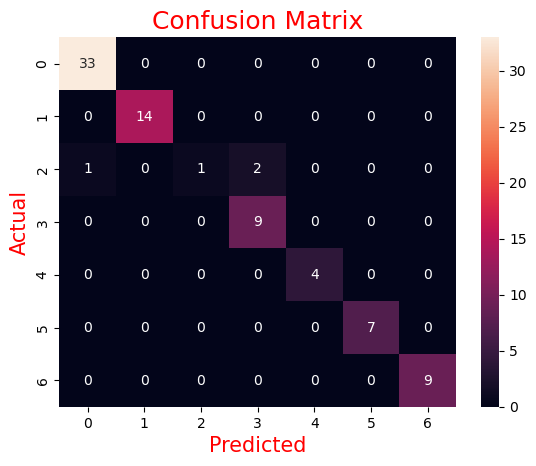

In [110]:
## Confusion matrix of training validation.
sns.heatmap(conf1,annot=True)
plt.xlabel('Predicted',size=15,color='red')
plt.ylabel("Actual",size=15,color='red')
plt.title("Confusion Matrix",size=18,color='red')

In [ ]:
 ## Confusion matrix for testing validation

Text(0.5, 1.0, 'Confusion Matrix')

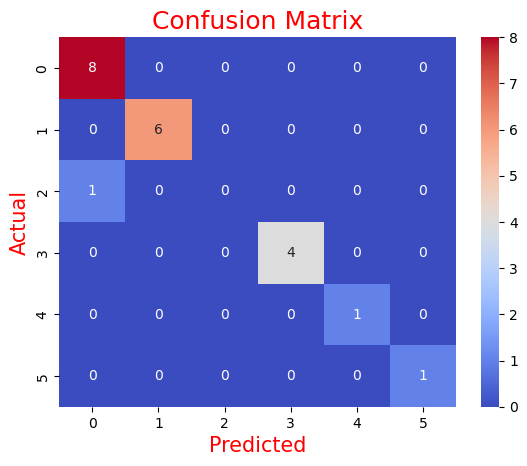

In [104]:
sns.heatmap(conf,annot=True,cmap='coolwarm')
plt.xlabel('Predicted',size=15,color='red')
plt.ylabel("Actual",size=15,color='red')
plt.title("Confusion Matrix",size=18,color='red')

In [120]:
print("classification Report of Training data")
print("--------------------------------------")
print(classification_report(y_train,y_pred))


classification Report of Training data
--------------------------------------
              precision    recall  f1-score   support

           1       0.97      1.00      0.99        33
           2       1.00      1.00      1.00        14
           3       1.00      0.25      0.40         4
           4       0.82      1.00      0.90         9
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         7
           7       1.00      1.00      1.00         9

    accuracy                           0.96        80
   macro avg       0.97      0.89      0.90        80
weighted avg       0.97      0.96      0.95        80



In [124]:
print("classification report of testing data")
print("-------------------------------------")
print(classification_report(y_test,y_pred1))

classification report of testing data
-------------------------------------
              precision    recall  f1-score   support

           1       0.89      1.00      0.94         8
           2       1.00      1.00      1.00         6
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1

    accuracy                           0.95        21
   macro avg       0.81      0.83      0.82        21
weighted avg       0.91      0.95      0.93        21



### Interview Questions:


### 1. What are the key hyperparameters in KNN?
#### n_neighbors is a key hyperparameter used in knn. In knn classifier the y_predict is calculated based on the majority class of n_neigbors to the testing data...and in knn_regressor the average value of n_neighbors to the testing data..n_neighbors indicates how much data points should be taken to predict the target and it is important to choose the correct value for the hyper parameter.
#### Taking very small number or big can leed to miss classification or Anomalous continuous value in regression.
##

### 2. What distance metrics can be used in KNN?
#### Euclidean Distance is used in knn...It is used to calculate the distance between 2 points in a same plane..
#### Formula: Sqrt((x2-x1)**2+(y2-y1)**2)